# Quantum classification of Iris dataset with 2 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

from quantum_classification import *

### Traing with 2 features

In [2]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [4]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

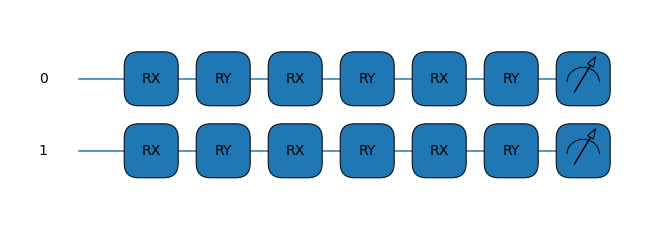

In [5]:
iris.draw_circuit()

In [6]:
iris.optimize()

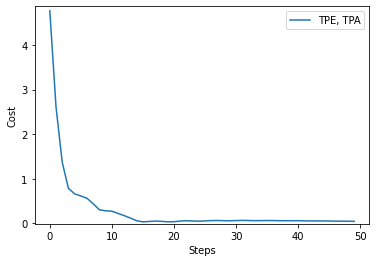

In [7]:
iris.plot_cost()

In [8]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.04539091787066694


### Train with 4 features

In [11]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.55 0.95 0.15 0.15] -1.0
[0.25 0.5  0.2  0.  ] -1.0
[0.6 0.2 1.4 0.5] 1.0


In [13]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

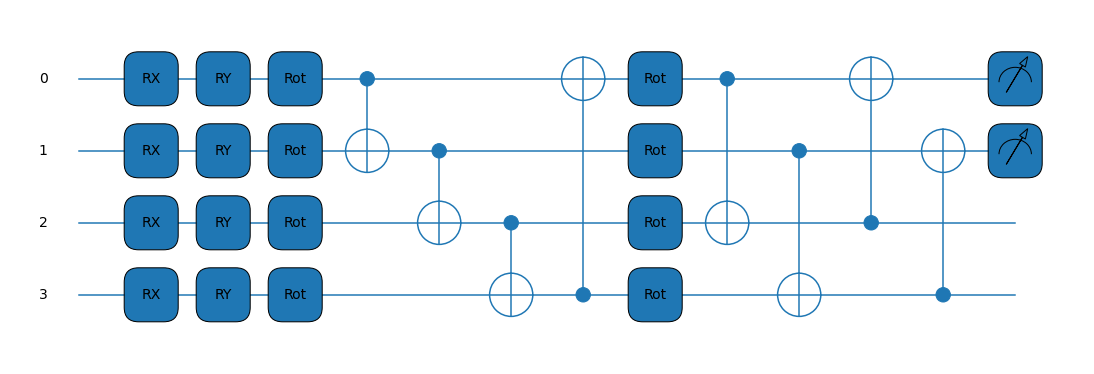

In [14]:
iris.draw_circuit()

In [15]:
iris.optimize()

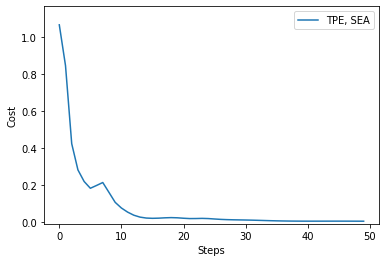

In [16]:
iris.plot_cost()

In [17]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.004038181982925655


## Another dataset

In [10]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.zeros(N)

for i,x in enumerate(X):
    if x[0] > 0:
        if x[1] > 0:
            Y[i] = 0
        else:
            Y[i] = 3
    else:
        if x[1] > 0:
            Y[i] = 1
        else:
            Y[i] = 2

print(X)
print(Y)

[[-0.97795566 -0.56778195]
 [ 0.73786157 -0.48306376]
 [-0.52585558 -0.67967131]
 [-0.64576108 -0.90935478]
 [ 0.60863433  0.34657891]
 [ 0.38377733 -0.8677814 ]
 [ 0.84958814 -0.4060989 ]
 [ 0.2473936  -0.50904551]
 [-0.47191392  0.81082607]
 [ 0.04461713 -0.4204703 ]
 [-0.15499518  0.97405472]
 [ 0.39875562  0.95442378]
 [ 0.96144055  0.57303423]
 [ 0.95907035  0.71701711]
 [-0.91885673  0.54556718]
 [-0.25441284  0.94500073]
 [-0.35312283 -0.6564354 ]
 [ 0.2793916   0.96017184]
 [ 0.94973361 -0.61833321]
 [-0.00847568 -0.87830075]
 [-0.22032535 -0.90605994]
 [-0.43671982  0.18099059]
 [-0.2545997   0.04298869]
 [ 0.804441   -0.42305338]
 [ 0.63497726 -0.91717937]
 [-0.60267609 -0.39703557]
 [ 0.7975936  -0.533303  ]
 [ 0.29640385  0.87304984]
 [-0.63010307 -0.57481461]
 [ 0.43581781  0.78099708]
 [ 0.74731676  0.39968961]
 [-0.74199828 -0.43927076]
 [ 0.51451492 -0.11939579]
 [-0.98128841 -0.20009958]
 [ 0.91766169  0.8917724 ]
 [ 0.78932814 -0.51913978]
 [-0.36094354 -0.21948337]
 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# settings
nqubits = 4; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
test = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

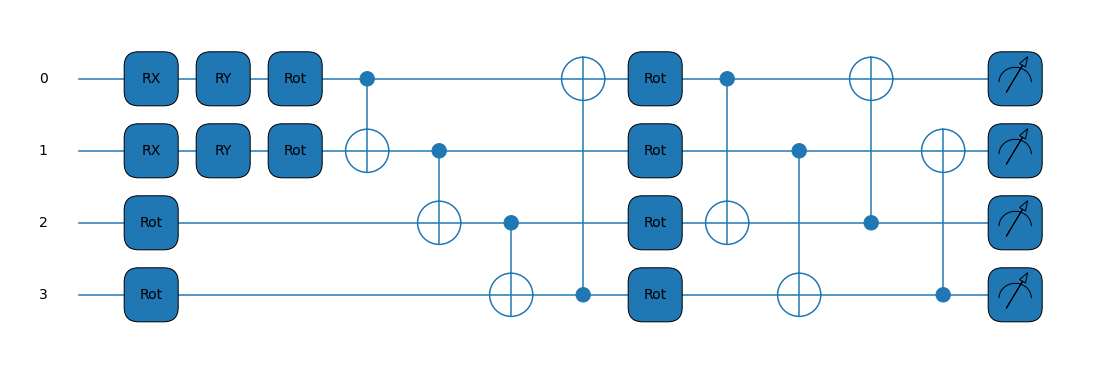

In [12]:
test.draw_circuit()

In [13]:
test.optimize()

KeyboardInterrupt: 

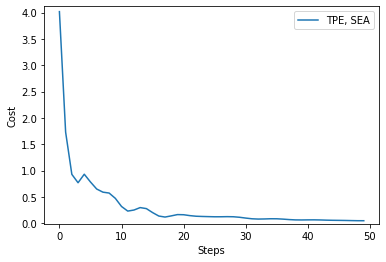

In [ ]:
test.plot_cost()

In [ ]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.04848731714968378
